## Exploratory Data Analysis
| Column    | Description | Data Format | Handling Missing Data |
| -------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------- | ---------------------------------------------------------------- |
| STATE |               | categorical     | done |
| PHYSHLTH | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?                | numeric     | impute 77, 99, BLANK with median of remaining values (1-30) and impute 88 with 0 |
| MENTHLTH | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? | numeric     | impute 77, 99, BLANK with median of remaining values (1-30) and impute 88 with 0 |
| ASTHMA3  | (Ever told) (you had) asthma?                                                                                                                                                    | categorical | done                                                             |
| HAVARTH5 | Has a doctor, nurse or other health professional ever told you that you had some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?                          | categorical | let BLANK be another category                                    |
| _MICHD   | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)                                                                            | categorical | let BLANK be another category                                    |

## Data wrangling

### Load and merge attributes related to states
- Region
- Division
- Percentage of polical party affiliation

In [1]:
import pandas as pd
import numpy as np

In [2]:
responses = pd.read_csv("llcp2021.csv", usecols = [ '_BMI5', '_BMI5CAT','_AGEG5YR', '_STATE', 'PHYSHLTH', 'MENTHLTH','ASTHMA3','HAVARTH5','_MICHD', 'RENTHOM1',
'PRIMINSR', 'EXERANY2'])
responses = responses.dropna(subset=['_BMI5', '_BMI5CAT'])
responses = responses[responses['_AGEG5YR'] != 14]
print(responses.shape)
responses.head()

(387021, 12)


,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,2.0,11.0,1454.0,1.0
2,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,1.0,11.0,2829.0,3.0
3,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0,3347.0,4.0
4,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,1.0,12.0,2873.0,3.0
5,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,2.0,13.0,2437.0,2.0


In [3]:
responses.describe()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT
count,387021.000000,387019.000000,387021.000000,387020.000000,387021.000000,387021.000000,387021.000000,387021.000000,383296.000000,387021.000000,387021.000000,387021.000000
mean,30.765483,62.783982,59.383767,9.703561,1.250483,1.875901,1.698711,1.369223,1.915614,7.622865,2856.804796,3.010183
std,15.418068,36.386319,37.630213,23.335046,0.498091,0.459756,0.620143,0.749144,0.277967,3.563107,655.876084,0.833211
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1200.000000,1.000000
25%,20.000000,21.000000,15.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2414.000000,2.000000
50%,31.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,8.000000,2744.000000,3.000000
75%,42.000000,88.000000,88.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,11.000000,3175.000000,4.000000
max,78.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,2.000000,13.000000,9933.000000,4.000000


In [4]:
#https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm

FIPS_codes = pd.read_csv('FIPS_codes.csv')
FIPS_codes.columns = ['State_name', 'State_abb','_STATE']
FIPS_codes.head()


,State_name,State_abb,_STATE
0,Alabama,AL,1
1,Alaska,AK,2
2,Arizona,AZ,4
3,Arkansas,AR,5
4,California,CA,6


In [5]:
responses = responses.merge(FIPS_codes, on='_STATE')
responses.head()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT,State_name,State_abb
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,2.0,11.0,1454.0,1.0,Alabama,AL
1,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,1.0,11.0,2829.0,3.0,Alabama,AL
2,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0,3347.0,4.0,Alabama,AL
3,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,1.0,12.0,2873.0,3.0,Alabama,AL
4,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,2.0,13.0,2437.0,2.0,Alabama,AL


In [6]:
#https://www.pewresearch.org/religion/religious-landscape-study/compare/party-affiliation/by/state/

State_party = pd.read_csv('FIPS_codes_party.csv')
State_party.columns = ['State_name', 'Republican', 'No_lean', 'Democrat', 'Sample_size']
State_party.head()

,State_name,Republican,No_lean,Democrat,Sample_size
0,Alabama,52%,13%,35%,511
1,Alaska,39%,29%,32%,310
2,Arizona,40%,21%,39%,653
3,Arkansas,46%,16%,38%,311
4,California,30%,21%,49%,"3,697"


In [7]:
for col in ['Republican', 'No_lean', 'Democrat']:
    State_party[col] = State_party[col].str.rstrip('%').astype('float') / 100.0


In [8]:
State_party.head()

,State_name,Republican,No_lean,Democrat,Sample_size
0,Alabama,0.52,0.13,0.35,511
1,Alaska,0.39,0.29,0.32,310
2,Arizona,0.40,0.21,0.39,653
3,Arkansas,0.46,0.16,0.38,311
4,California,0.30,0.21,0.49,"3,697"


In [9]:
responses = responses.merge(State_party, on='State_name')
responses.head()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT,State_name,State_abb,Republican,No_lean,Democrat,Sample_size
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,2.0,11.0,1454.0,1.0,Alabama,AL,0.52,0.13,0.35,511
1,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,1.0,11.0,2829.0,3.0,Alabama,AL,0.52,0.13,0.35,511
2,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0,3347.0,4.0,Alabama,AL,0.52,0.13,0.35,511
3,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,1.0,12.0,2873.0,3.0,Alabama,AL,0.52,0.13,0.35,511
4,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,2.0,13.0,2437.0,2.0,Alabama,AL,0.52,0.13,0.35,511


In [10]:
#https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv

State_region = pd.read_csv('FIPS_codes_region.csv')
State_region.columns = ['State_name', 'State_abb','Region','Division']
State_region.head()

,State_name,State_abb,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [11]:
responses = responses.merge(State_region, on=['State_name', 'State_abb'])
responses.head()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT,State_name,State_abb,Republican,No_lean,Democrat,Sample_size,Region,Division
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,2.0,11.0,1454.0,1.0,Alabama,AL,0.52,0.13,0.35,511,South,East South Central
1,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,1.0,11.0,2829.0,3.0,Alabama,AL,0.52,0.13,0.35,511,South,East South Central
2,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0,3347.0,4.0,Alabama,AL,0.52,0.13,0.35,511,South,East South Central
3,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,1.0,12.0,2873.0,3.0,Alabama,AL,0.52,0.13,0.35,511,South,East South Central
4,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,2.0,13.0,2437.0,2.0,Alabama,AL,0.52,0.13,0.35,511,South,East South Central


In [12]:
responses.drop(columns = ['State_name', 'State_abb'], inplace =True)

In [13]:
responses.head()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT,Republican,No_lean,Democrat,Sample_size,Region,Division
0,1.0,20.0,10.0,3.0,2.0,1.0,1.0,1.0,2.0,11.0,1454.0,1.0,0.52,0.13,0.35,511,South,East South Central
1,1.0,88.0,88.0,2.0,2.0,2.0,2.0,1.0,1.0,11.0,2829.0,3.0,0.52,0.13,0.35,511,South,East South Central
2,1.0,88.0,10.0,2.0,1.0,2.0,2.0,1.0,2.0,9.0,3347.0,4.0,0.52,0.13,0.35,511,South,East South Central
3,1.0,30.0,88.0,3.0,1.0,2.0,2.0,1.0,1.0,12.0,2873.0,3.0,0.52,0.13,0.35,511,South,East South Central
4,1.0,88.0,88.0,3.0,2.0,2.0,2.0,1.0,2.0,13.0,2437.0,2.0,0.52,0.13,0.35,511,South,East South Central


### Create new columns that categorieses number days in good physical and metal health 

In [14]:
conditions  = [ responses['PHYSHLTH']<= 30, responses['PHYSHLTH']== 88,  responses['PHYSHLTH']== 77, responses['PHYSHLTH'] == 99, responses['PHYSHLTH']== np.nan ]
choices     = [ "Present",  "Present", 'Don’t know', 'Rejected', 'Missing' ]
    
responses['PHYSHLTH_CAT'] = np.select(conditions, choices, default= 'Missing')

conditions  = [ responses['_BMI5CAT'] == 1, responses['_BMI5CAT']== 2, responses['_BMI5CAT'] == 3, responses['_BMI5CAT'] == 4 ]
choices     = [ "Underweight", 'Normal Weight', 'Overweight', 'Obese']
    
responses['BMI5CAT'] = np.select(conditions, choices, default=np.nan)

print(responses['PHYSHLTH_CAT'].unique(), responses['BMI5CAT'].unique())

['Present' 'Don’t know' 'Rejected' 'Missing'] ['Underweight' 'Overweight' 'Obese' 'Normal Weight']


In [15]:
def replace_PHS_MEN_median(df, colname):
    med_30less = df[df[colname]<= 30][[colname]].median()
    print(med_30less)

    df[colname].fillna(med_30less, inplace = True)
    #replace None with 0
    df.replace({colname: { np.nan:med_30less, 77:med_30less,  88:0, 99:med_30less}}, inplace = True)
    return df

responses = replace_PHS_MEN_median(responses, 'PHYSHLTH')
responses = replace_PHS_MEN_median(responses, 'MENTHLTH')
responses.describe()

responses.isna().sum()

PHYSHLTH    5.0
dtype: float64


MENTHLTH    7.0
dtype: float64


_STATE             0
PHYSHLTH           0
MENTHLTH           0
PRIMINSR           1
EXERANY2           0
ASTHMA3            0
HAVARTH5           0
RENTHOM1           0
_MICHD          3670
_AGEG5YR           0
_BMI5              0
_BMI5CAT           0
Republican         0
No_lean            0
Democrat           0
Sample_size        0
Region             0
Division           0
PHYSHLTH_CAT       0
BMI5CAT            0
dtype: int64

In [16]:
def create_str_cat(df, colnames):
    for colname in colnames:
        print(df[colname].unique())
        df[colname].fillna('BLANK', inplace = True)
        df.replace({colname: {1:'Yes',  2:'No', 7:'Not Sure', 9:'Refused',  np.nan:'BLANK'}}, inplace = True)
        print(df[colname].unique())
    return df

responses = create_str_cat(responses, ['_MICHD', 'HAVARTH5'])


[ 2.  1. nan]


['No' 'Yes' 'BLANK']
[1. 2. 7. 9.]
['Yes' 'No' 'Not Sure' 'Refused']


In [17]:
responses.dtypes

_STATE          float64
PHYSHLTH        float64
MENTHLTH        float64
PRIMINSR        float64
EXERANY2        float64
ASTHMA3         float64
HAVARTH5         object
RENTHOM1        float64
_MICHD           object
_AGEG5YR        float64
_BMI5           float64
_BMI5CAT        float64
Republican      float64
No_lean         float64
Democrat        float64
Sample_size      object
Region           object
Division         object
PHYSHLTH_CAT     object
BMI5CAT          object
dtype: object

In [18]:
responses.isna().sum()

_STATE          0
PHYSHLTH        0
MENTHLTH        0
PRIMINSR        1
EXERANY2        0
ASTHMA3         0
HAVARTH5        0
RENTHOM1        0
_MICHD          0
_AGEG5YR        0
_BMI5           0
_BMI5CAT        0
Republican      0
No_lean         0
Democrat        0
Sample_size     0
Region          0
Division        0
PHYSHLTH_CAT    0
BMI5CAT         0
dtype: int64

In [19]:
responses.head()

,_STATE,PHYSHLTH,MENTHLTH,PRIMINSR,EXERANY2,ASTHMA3,HAVARTH5,RENTHOM1,_MICHD,_AGEG5YR,_BMI5,_BMI5CAT,Republican,No_lean,Democrat,Sample_size,Region,Division,PHYSHLTH_CAT,BMI5CAT
0,1.0,20.0,10.0,3.0,2.0,1.0,Yes,1.0,No,11.0,1454.0,1.0,0.52,0.13,0.35,511,South,East South Central,Present,Underweight
1,1.0,0.0,0.0,2.0,2.0,2.0,No,1.0,Yes,11.0,2829.0,3.0,0.52,0.13,0.35,511,South,East South Central,Present,Overweight
2,1.0,0.0,10.0,2.0,1.0,2.0,No,1.0,No,9.0,3347.0,4.0,0.52,0.13,0.35,511,South,East South Central,Present,Obese
3,1.0,30.0,0.0,3.0,1.0,2.0,No,1.0,Yes,12.0,2873.0,3.0,0.52,0.13,0.35,511,South,East South Central,Present,Overweight
4,1.0,0.0,0.0,3.0,2.0,2.0,No,1.0,No,13.0,2437.0,2.0,0.52,0.13,0.35,511,South,East South Central,Present,Normal Weight


In [21]:
# Rent
print(responses['RENTHOM1'].unique())
responses['RENTHOM1'].fillna('BLANK', inplace = True)
responses.replace({'RENTHOM1': {1:'Own',  2:'Rent', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(responses['RENTHOM1'].unique())


In [24]:
# Primary Insurance
responses['PRIMINSR'].fillna('BLANK', inplace = True)
responses.replace({'PRIMINSR': {1:'Employer',  2:'Private', 3:'Medicare', 4:'Medigap',  5:'Medicaid', 6:'Children Health Insurance Program', 7:'Military', 8:'Indian Health Service', 9:'State sponsored', 10:'Other government',  88:'No coverage', 77:'BLANK', 99:'BLANK', np.nan:'BLANK'}}, inplace = True)
print(responses['PRIMINSR'].unique())

['Medicare' 'Private' 'Employer' 'BLANK' 'No coverage' 'Medicaid'
 'Military' 'Other governmen' 'State sponsored' 'Medigap'
 'Indian Health Service' 'Children Health Insurance Program']


In [ ]:
# Exercise in Past 30 Days 
print(responses['EXERANY2'].unique())
responses['EXERANY2'].fillna('BLANK', inplace = True)
responses.replace({'EXERANY2': {1:'Yes',  2:'No', 3:'Other', 7:'BLANK', 9:'BLANK',  np.nan:'BLANK'}}, inplace = True)
print(responses['EXERANY2'].unique())


### Compute proportion of BMI categories within a given category
- Good physical health 
- Good mental health 

,BMI5CAT,PHYSHLTH_CAT,0
0,Normal Weight,Don’t know,0.015539
1,Normal Weight,Present,0.981541
2,Normal Weight,Rejected,0.002920
3,Obese,Don’t know,0.018215
4,Obese,Missing,0.000016
5,Obese,Present,0.978641
6,Obese,Rejected,0.003128
7,Overweight,Don’t know,0.015582
8,Overweight,Present,0.981474
9,Overweight,Rejected,0.002944


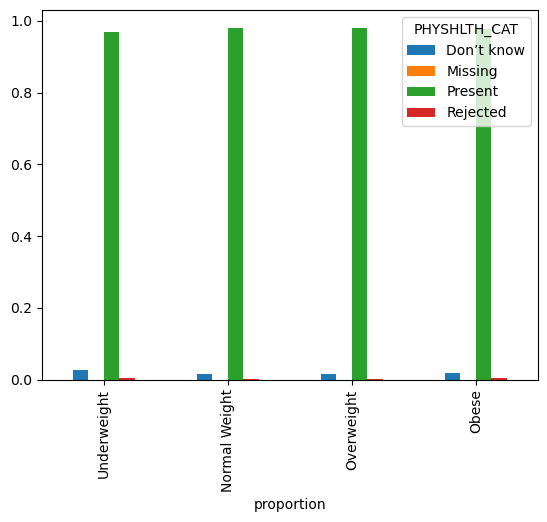

In [37]:
def get_bmi_prop(colname):
    bmi_prop = responses[['BMI5CAT',colname]].groupby(['BMI5CAT',colname]).size()/ responses.groupby('BMI5CAT')[colname].size()
    bmi_prop=bmi_prop.reset_index()
    order=["Underweight", 'Normal Weight', 'Overweight', 'Obese']
    bmi_prop.pivot(index='BMI5CAT', columns=colname, values=0).loc[order].plot.bar(xlabel ="proportion")
    return bmi_prop
    # 

get_bmi_prop('PHYSHLTH_CAT')

### Plot distribution of number of days in good physical or mental health as boxplot


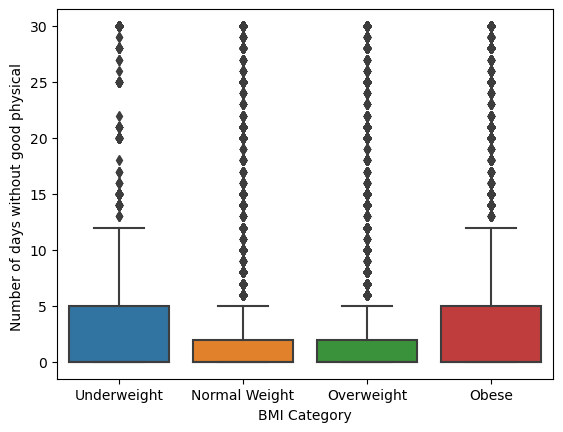

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplot_phy_ment(colname):
    bmi_cont = responses[responses[colname]<= 30]
    sns.boxplot(data=bmi_cont, x='BMI5CAT', y=colname, order=["Underweight", 'Normal Weight', 'Overweight', 'Obese'])
    plt.xlabel("BMI Category")
    plt.ylabel("Number of days without good physical ")
    return bmi_cont 

bmi_phs_cont = boxplot_phy_ment('PHYSHLTH')

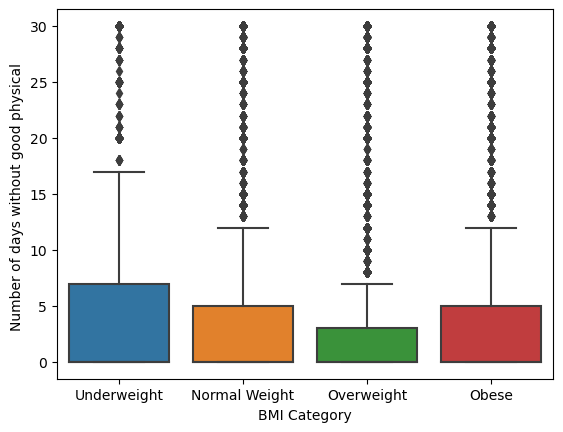

In [21]:
bmi_ment_cont = boxplot_phy_ment('MENTHLTH')

In [22]:
import gc
del bmi_phs_cont, bmi_ment_cont
gc.collect()

9845

,BMI5CAT,ASTHMA3,0
0,Normal Weight,1.0,0.116907
1,Normal Weight,2.0,0.879967
2,Normal Weight,7.0,0.002947
3,Normal Weight,9.0,0.000179
4,Obese,1.0,0.182401
5,Obese,2.0,0.813923
6,Obese,7.0,0.003504
7,Obese,9.0,0.000172
8,Overweight,1.0,0.121065
9,Overweight,2.0,0.875954


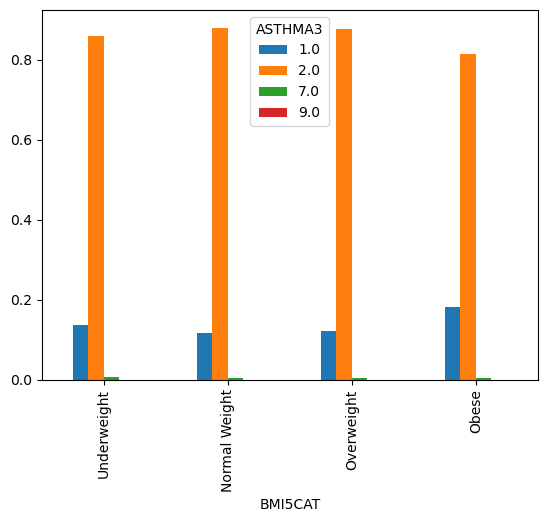

In [23]:
get_bmi_prop('ASTHMA3')
	

,BMI5CAT,HAVARTH5,0
0,Normal Weight,No,0.732242
1,Normal Weight,Not Sure,0.005439
2,Normal Weight,Refused,0.000214
3,Normal Weight,Yes,0.262105
4,Obese,No,0.584494
5,Obese,Not Sure,0.005350
6,Obese,Refused,0.000203
7,Obese,Yes,0.409953
8,Overweight,No,0.677322
9,Overweight,Not Sure,0.005048


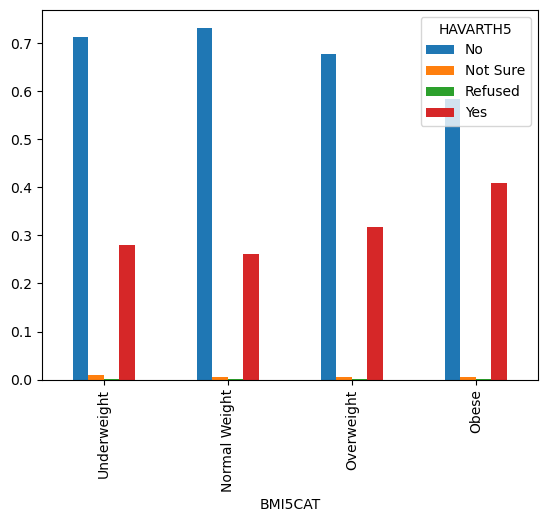

In [24]:
get_bmi_prop('HAVARTH5')

,BMI5CAT,_MICHD,0
0,Normal Weight,BLANK,0.008671
1,Normal Weight,No,0.926307
2,Normal Weight,Yes,0.065022
3,Obese,BLANK,0.011301
4,Obese,No,0.890616
5,Obese,Yes,0.098083
6,Overweight,BLANK,0.008638
7,Overweight,No,0.905683
8,Overweight,Yes,0.085678
9,Underweight,BLANK,0.015114


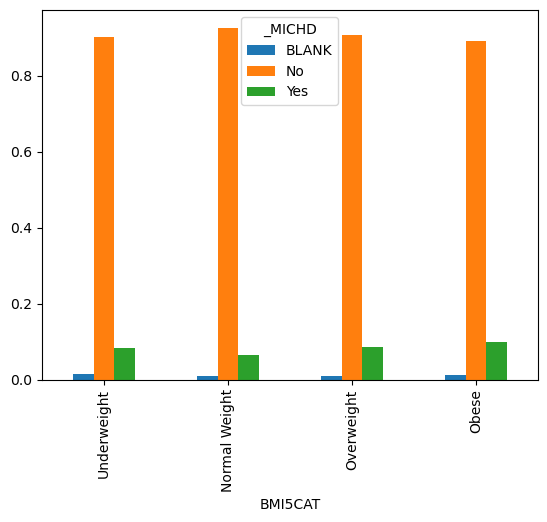

In [25]:
get_bmi_prop('_MICHD')

In [35]:
responses.columns

Index(['_STATE', 'PHYSHLTH', 'MENTHLTH', 'ASTHMA3', 'HAVARTH5', '_MICHD',
       '_AGEG5YR', '_BMI5', '_BMI5CAT', 'Republican', 'No_lean', 'Democrat',
       'Sample_size', 'Region', 'Division', 'PHYSHLTH_CAT', 'BMI5CAT'],
      dtype='object')

In [34]:
def get_bmi_prop_reverse(colname, plt_title):
    bmi_prop = responses[['BMI5CAT',colname]].groupby(['BMI5CAT',colname]).size()/ responses.groupby(colname)['BMI5CAT'].size()
    bmi_prop=bmi_prop.reset_index()
    bmi_prop.pivot(index=colname, columns='BMI5CAT', values=0).plot.bar(title = plt_title)
    return bmi_prop

,BMI5CAT,Region,0
0,Normal Weight,Midwest,0.271834
1,Normal Weight,Northeast,0.314195
2,Normal Weight,South,0.275884
3,Normal Weight,West,0.324409
4,Obese,Midwest,0.362212
5,Obese,Northeast,0.311742
6,Obese,South,0.360302
7,Obese,West,0.299375
8,Overweight,Midwest,0.351861
9,Overweight,Northeast,0.357397


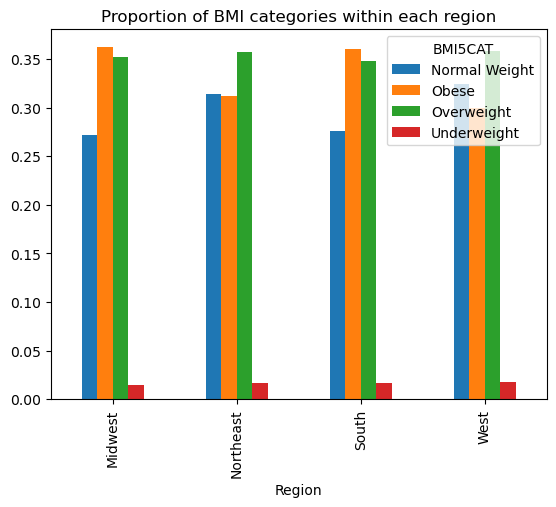

In [36]:
get_bmi_prop_reverse('Region', 'Proportion of BMI categories within each region')

In [29]:
# bmi_exc = responses[['BMI5CAT','EXERANY2']].groupby(['BMI5CAT','EXERANY2']).size()/ responses.groupby('BMI5CAT')['EXERANY2'].size()
# bmi_exc=bmi_exc.reset_index()
# bmi_exc.pivot(index='BMI5CAT', columns='EXERANY2', values=0).plot.bar()
# plt.title("Participate in any physical activities or exercises")
# plt.legend(["Yes", "No", "Don’t know/Not Sure","Refused"])

In [31]:
# correlation plot for PHYSHLTH	MENTHLTH ASTHMA3 HAVARTH5 _MICHD	_AGEG5YR	_BMI5
# dummy code ASTHMA3, HAVARTH5, _MICHD, Region

corr_df =  responses[[ '_BMI5', '_AGEG5YR', 'PHYSHLTH', 'MENTHLTH','ASTHMA3','HAVARTH5','_MICHD', 'Republican',	'No_lean',	'Democrat', 'Region']]
corr_df = pd.get_dummies(data=corr_df, columns=['ASTHMA3','HAVARTH5','_MICHD','Region'])
corr_df.head()

,_BMI5,_AGEG5YR,PHYSHLTH,MENTHLTH,Republican,No_lean,Democrat,ASTHMA3_1.0,ASTHMA3_2.0,ASTHMA3_7.0,...,HAVARTH5_Not Sure,HAVARTH5_Refused,HAVARTH5_Yes,_MICHD_BLANK,_MICHD_No,_MICHD_Yes,Region_Midwest,Region_Northeast,Region_South,Region_West
0,1454.0,11.0,20.0,10.0,0.52,0.13,0.35,1,0,0,...,0,0,1,0,1,0,0,0,1,0
1,2829.0,11.0,0.0,0.0,0.52,0.13,0.35,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3347.0,9.0,0.0,10.0,0.52,0.13,0.35,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,2873.0,12.0,30.0,0.0,0.52,0.13,0.35,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,2437.0,13.0,0.0,0.0,0.52,0.13,0.35,0,1,0,...,0,0,0,0,1,0,0,0,1,0


<Axes: >

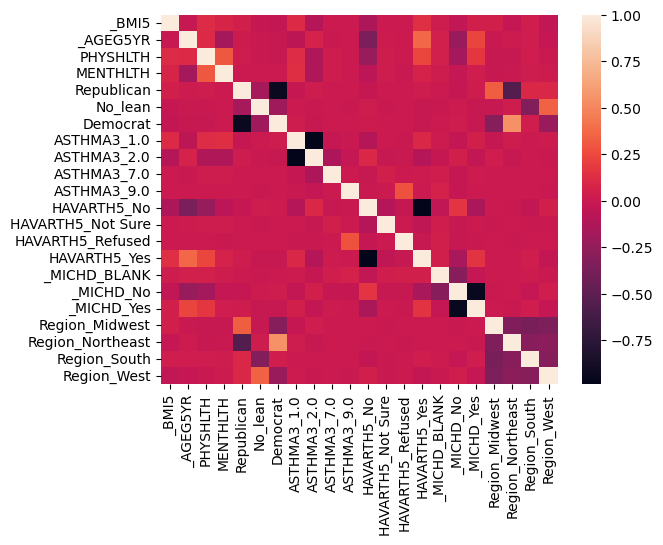

In [33]:
import seaborn as sns

sns.heatmap(corr_df.corr())
